In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Converting the CSV files into dataframes
col_index = [i for i in range(29)] + [i for i in range(41, 50)] + [70, 71, 72]
df = pd.read_csv('ev_data.csv', usecols=[i for i in col_index], dtype={'zip': str, 'ev_network_web': str, 'ev_renewable_source': str, 'ev_other_evse': str, 'ev_workplace_charging': str}) 
sdge_areas = pd.read_csv('SDGE_service_list.csv', usecols=['ZipCode'])

In [3]:
#Getting the zip codes for all the areas at SDGE serves
sdge_zip_codes = [str(element) for element in sdge_areas['ZipCode'].unique()]
sdge_zip_codes

['91901',
 '91902',
 '91905',
 '91906',
 '91910',
 '91911',
 '91912',
 '91913',
 '91914',
 '91915',
 '91916',
 '91917',
 '91931',
 '91932',
 '91934',
 '91935',
 '91941',
 '91942',
 '91945',
 '91948',
 '91950',
 '91962',
 '91963',
 '91977',
 '91978',
 '91980',
 '92003',
 '92004',
 '92007',
 '92008',
 '92009',
 '92010',
 '92011',
 '92014',
 '92019',
 '92020',
 '92021',
 '92024',
 '92025',
 '92026',
 '92027',
 '92028',
 '92029',
 '92036',
 '92037',
 '92040',
 '92045',
 '92049',
 '92054',
 '92055',
 '92056',
 '92057',
 '92058',
 '92059',
 '92060',
 '92061',
 '92064',
 '92065',
 '92066',
 '92067',
 '92068',
 '92069',
 '92070',
 '92071',
 '92072',
 '92075',
 '92078',
 '92079',
 '92081',
 '92082',
 '92083',
 '92084',
 '92085',
 '92086',
 '92091',
 '92092',
 '92093',
 '92096',
 '92101',
 '92102',
 '92103',
 '92104',
 '92105',
 '92106',
 '92107',
 '92108',
 '92109',
 '92110',
 '92111',
 '92112',
 '92113',
 '92114',
 '92115',
 '92116',
 '92117',
 '92118',
 '92119',
 '92120',
 '92121',
 '92122',


In [4]:
#Querying the data to only include chargers within the areas that SDGE serves
df = df[df['zip'].isin(sdge_zip_codes)]
df

,station_name,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids
9,Scripps Green Hospital,public,24 hours daily,NaN,NaN,2024-08-15,NaN,ELEC,Public,6355,...,1.0,Non-Networked,NaN,NaN,Free; parking fee,NaN,False,Public,NaN,NaN
128,Mossy Nissan - El Cajon,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39886,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
131,Mossy Nissan - Escondido,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39889,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
155,Mossy Nissan,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39915,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
156,Mossy Nissan - Oceanside,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39916,...,2.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18447,SKYLINE C.A. STATION 1,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,355493,...,1.0,ChargePoint Network,http://www.chargepoint.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['USCPIL9013211'], 'posts': ['1588..."
18448,SKYLINE C.A. STATION 2,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,355494,...,1.0,ChargePoint Network,http://www.chargepoint.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['USCPIL9013261'], 'posts': ['1588..."
18526,El Norte Broadway Center - Escondido,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,356127,...,NaN,eVgo Network,https://www.evgo.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['69576'], 'posts': ['149507', '14..."
18532,Boardwalk Condos,public,9am-5pm M-F,NaN,A ACCOUNT_BALANCE CREDIT D Debit M V,2024-10-11,NaN,ELEC,Public,356216,...,4.0,EVMATCH,https://www.evmatch.com,NaN,NaN,NaN,False,Public,NaN,NaN


# Time-Series Graphs

In [5]:
#Creating new columns 

#Cleaning the data to get rid of any NaN values in the open_date column
time_df = df.dropna(subset=['open_date'])

#Making the open_date column into a datetime object
time_df['open_date'] = pd.to_datetime(time_df['open_date'])

time_df

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_11358/2029698891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['open_date'] = pd.to_datetime(time_df['open_date'])


,station_name,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids
9,Scripps Green Hospital,public,24 hours daily,NaN,NaN,2024-08-15,NaN,ELEC,Public,6355,...,1.0,Non-Networked,NaN,NaN,Free; parking fee,NaN,False,Public,NaN,NaN
128,Mossy Nissan - El Cajon,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39886,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
131,Mossy Nissan - Escondido,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39889,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
155,Mossy Nissan,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39915,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
156,Mossy Nissan - Oceanside,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39916,...,2.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18447,SKYLINE C.A. STATION 1,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,355493,...,1.0,ChargePoint Network,http://www.chargepoint.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['USCPIL9013211'], 'posts': ['1588..."
18448,SKYLINE C.A. STATION 2,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,355494,...,1.0,ChargePoint Network,http://www.chargepoint.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['USCPIL9013261'], 'posts': ['1588..."
18526,El Norte Broadway Center - Escondido,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,356127,...,NaN,eVgo Network,https://www.evgo.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['69576'], 'posts': ['149507', '14..."
18532,Boardwalk Condos,public,9am-5pm M-F,NaN,A ACCOUNT_BALANCE CREDIT D Debit M V,2024-10-11,NaN,ELEC,Public,356216,...,4.0,EVMATCH,https://www.evmatch.com,NaN,NaN,NaN,False,Public,NaN,NaN


In [6]:
#Creating a dataframe for the number of EV chargers opened every year for every city
time_graph = time_df
time_graph['open_year'] = df['open_date'].str[:4]
time_graph['open_year'] = time_graph['open_year'].dropna()
time_graph['open_year'] = time_graph['open_year'].astype(int)
time_graph = time_graph.groupby(['open_year', 'city']).count()
time_graph = time_graph.reset_index()
time_graph = time_graph[['open_year', 'city', 'station_name']]
time_graph['station_name'] = time_graph['station_name'].astype(float)
time_graph

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_11358/2286801830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_graph['open_year'] = df['open_date'].str[:4]
/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_11358/2286801830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_graph['open_year'] = time_graph['open_year'].dropna()
/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_11358/2286801830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,open_year,city,station_name
0,1997,La Jolla,1.0
1,2006,San Diego,1.0
2,2011,Chula Vista,1.0
3,2011,El Cajon,2.0
4,2011,Escondido,2.0
...,...,...,...
235,2024,San Marcos,3.0
236,2024,Santa Ysabel,1.0
237,2024,Santee,1.0
238,2024,Solana Beach,1.0


In [7]:
#Array of all of the names of the cities that SDGE serves
city_names = time_graph['city'].unique()
city_names

array(['La Jolla', 'San Diego', 'Chula Vista', 'El Cajon', 'Escondido',
       'National City', 'Oceanside', 'Poway', 'San Juan Capistrano',
       'Vista', 'Aliso Viejo', 'Carlsbad', 'Solana Beach', 'Lemon Grove',
       'Coronado', 'Laguna Beach', 'Rancho Santa Fe', 'San Clemente',
       'San Marcos', 'Dana Point', 'Del Mar', 'Mission Viejo', 'Alpine',
       'Corona del Mar', 'Encinitas', 'Laguna Hills', 'Julian',
       'Huntington Beach', 'San Ysidro', 'Lakeside', 'Newport Beach',
       'Pauma Valley', 'Fallbrook', 'La Mesa', 'Ramona',
       'Rancho Mission Viejo', 'Rancho Santa Margarita', 'Santa Ysabel',
       'Santee', 'Camp Pendleton', 'Imperial Beach', 'Jamul',
       'Ladera Ranch', 'Laguna Niguel', 'Spring Valley', 'Valley Center',
       'Borrego Springs', 'Campo', 'Cardiff by the Sea', 'Oceano', 'Pala',
       'Carmel Valley', 'Coto De Caza', 'Laguna Woods', 'Warner Springs',
       'Guatay'], dtype=object)

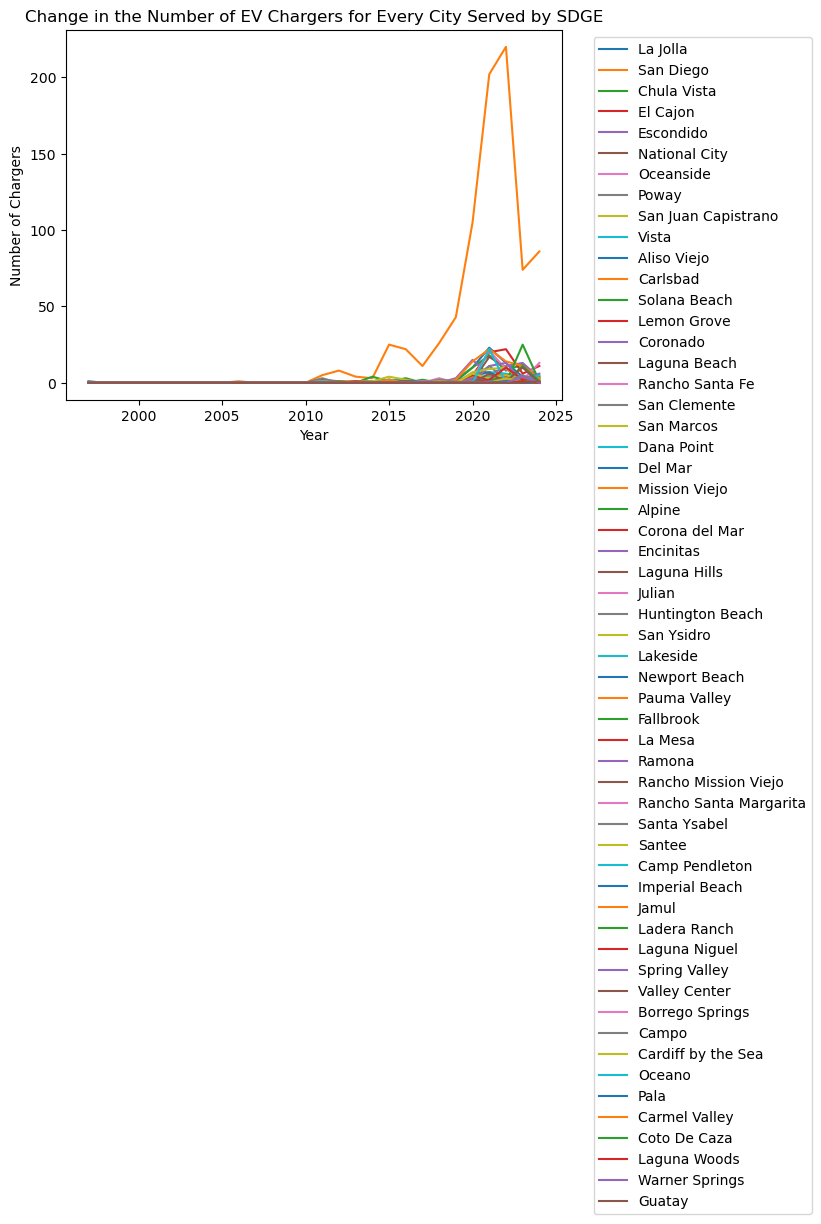

In [8]:
#Plotting the number of EV chargers for every city over time
graph_df = pd.DataFrame() 
graph_df['open_year'] = np.arange(1997, 2025)

for city in city_names:
    num_chargers = []
    time_graph_subset = time_graph[time_graph['city'] == city].set_index('open_year')
    for i in graph_df['open_year']:
        if i in time_graph_subset.index:
            num_chargers = num_chargers + [time_graph_subset['station_name'].loc[i]]
        else:
            num_chargers = num_chargers + [0]
    graph_df[city] = num_chargers
    
graph_df = graph_df.set_index('open_year')

graph_df.plot(title = 'Change in the Number of EV Chargers for Every City Served by SDGE', xlabel = 'Year', ylabel = 'Number of Chargers');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

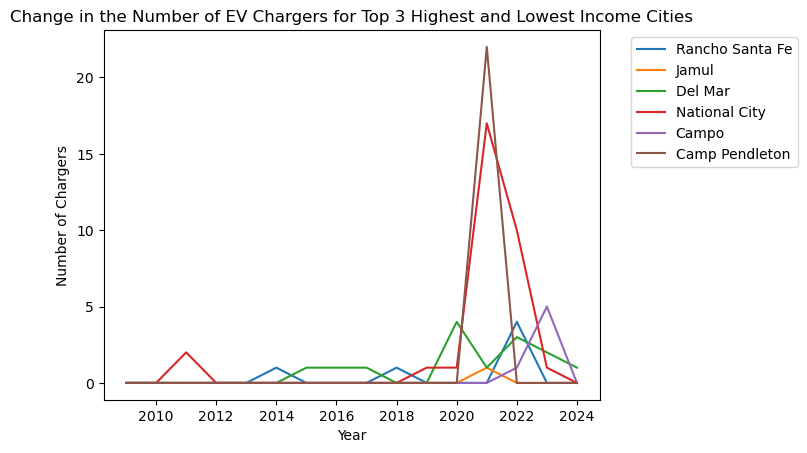

In [9]:
#Time Series Plot to see if wealth has an impact on EV charger placement
graph_subset = graph_df.reset_index()
graph_subset = graph_subset[graph_subset['open_year'] >= 2009]
graph_subset = graph_subset.set_index('open_year')
graph_subset[['Rancho Santa Fe', 'Jamul', 'Del Mar', 'National City', 'Campo', 'Camp Pendleton']].plot(title = 'Change in the Number of EV Chargers for Top 3 Highest and Lowest Income Cities', xlabel = 'Year', ylabel = 'Number of Chargers');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

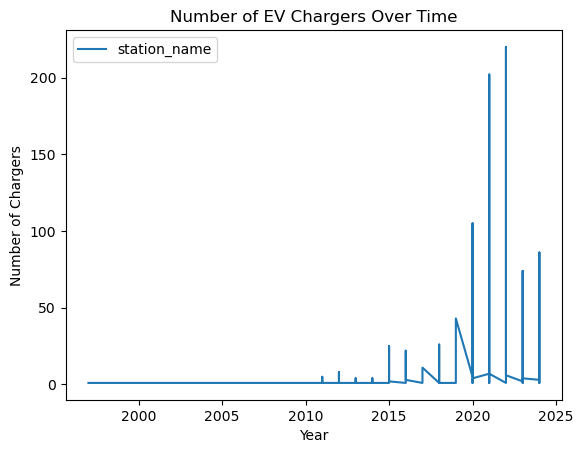

In [10]:
#Total number of chargers over time
time_graph.plot('open_year', title = 'Number of EV Chargers Over Time', xlabel = 'Year', ylabel = 'Number of Chargers');

# Geospatial Plots

In [11]:
# Load GeoJSON
import geopandas as gpd
from shapely.geometry import Point

In [12]:
#Finding the total number of chargers in every city

total_chargers = df.groupby('city', as_index=False).count()
total_chargers['num_chargers'] = total_chargers['station_name']
total_chargers = total_chargers[['city', 'num_chargers']]
# total_chargers = total_chargers.loc[total_chargers['city'].isin(sdge_df['name'].unique())]
total_chargers['city'] = total_chargers['city'].str.strip()
total_chargers

,city,num_chargers
0,Aliso Viejo,17
1,Alpine,3
2,Borrego Springs,2
3,Camp Pendleton,22
4,Campo,6
5,Cardiff by the Sea,4
6,Carlsbad,71
7,Carmel Valley,1
8,Chula Vista,62
9,Corona del Mar,1


<AxesSubplot:>

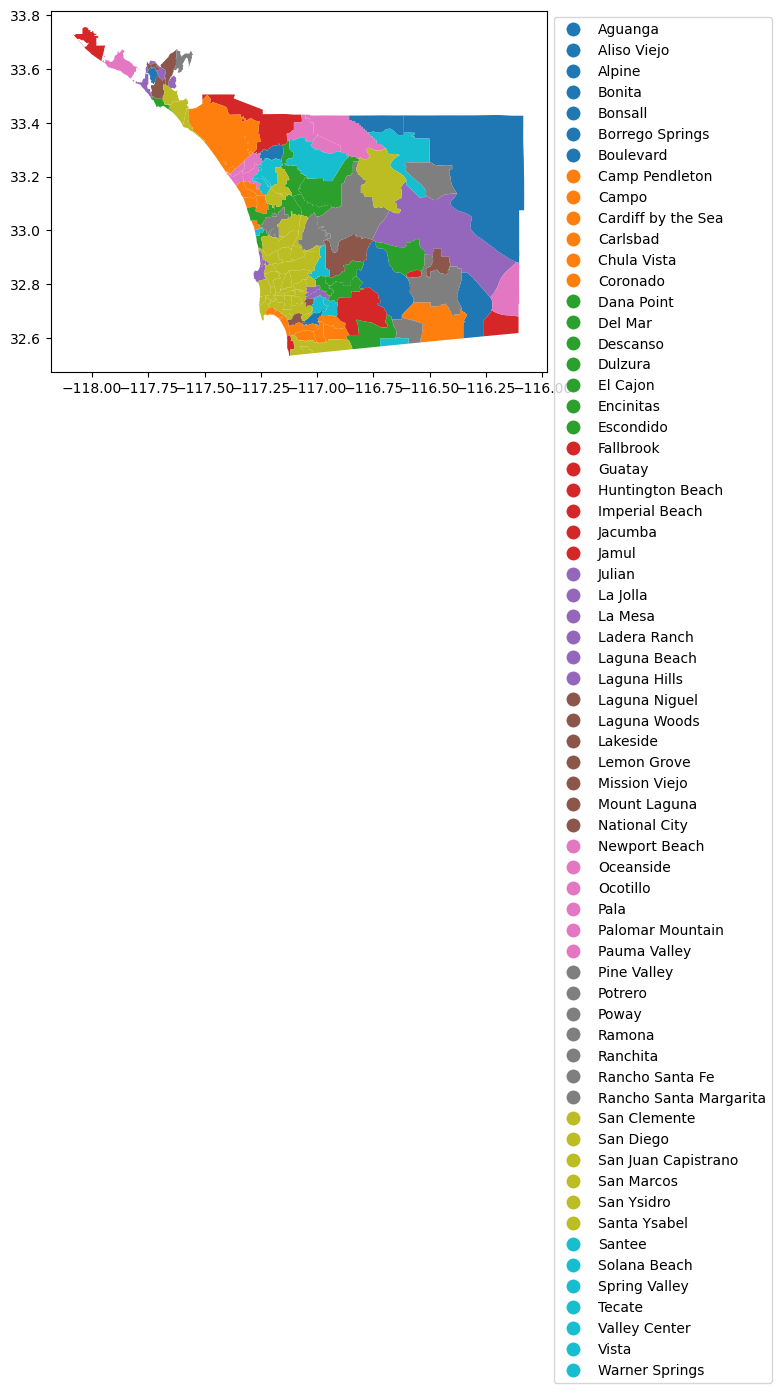

In [14]:
#Creating a map of every city SDGE serves

#San Diego cities
geo_df5 = gpd.read_file('zip_codes.geojson')
geo_df5['name'] = geo_df5['community']
geo_df5 = geo_df5[['name', 'geometry']]

#Orange County cities
oc_df = gpd.read_file('oc_boundaries.geojson')
oc_df['name'] = oc_df['NAME']
oc_df = oc_df[['name', 'geometry']]
oc_df = oc_df.loc[oc_df['name'].isin(city_names)]
    
#All cities combined
sdge_df = pd.concat([geo_df5, oc_df])
sdge_df['name'] = sdge_df['name'].str.strip()

#Plotting the SDGE service area map
sdge_df.plot(column = 'name', legend = True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_11358/2807969509.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['city']):


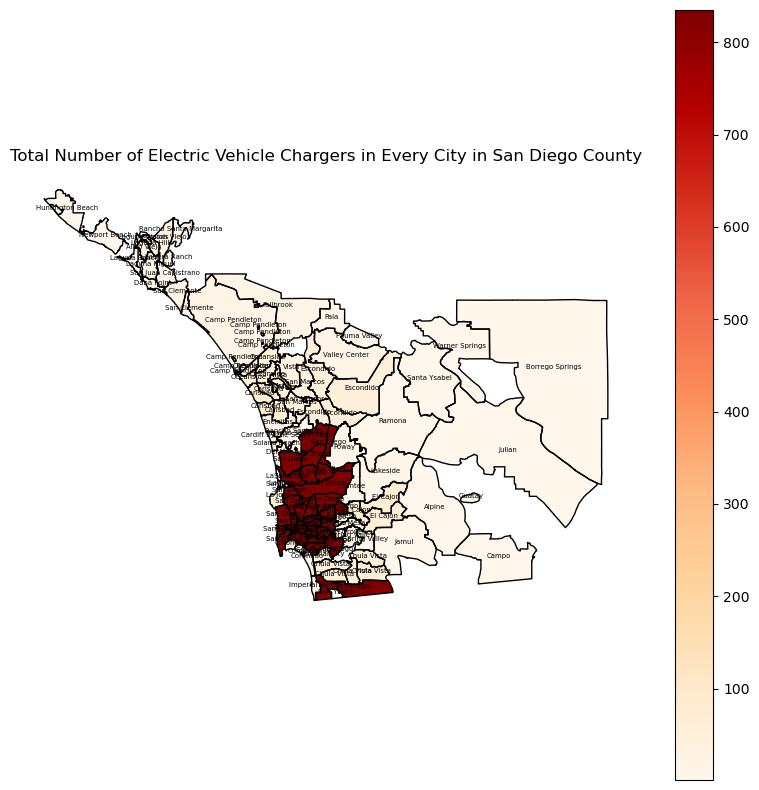

In [15]:
#Creating a choropleth map of the number of chargers in every city

#Combining the mapping data and the total number of chargers data together 
gdf = sdge_df.merge(total_chargers, left_on='name', right_on='city')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
gdf.boundary.plot(ax=ax, linewidth=1, color='black') 
gdf.plot(column='num_chargers', ax=ax, legend=True,
         cmap='OrRd',  # Choose a colormap
         missing_kwds={'color': 'lightgrey', 'label': 'Missing values'})  # Handle missing values

# Customize the plot
plt.title('Total Number of Electric Vehicle Chargers in Every City in San Diego County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')  

#Putting labels for every city
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['city']):
    ax.annotate(label, xy=(x, y), horizontalalignment='center', fontsize=5, color='black')


# Show the plot
plt.show()

In [16]:
#Dataframe without San Diego chargers
gdf2 = sdge_df.merge(total_chargers[total_chargers['city'] != 'San Diego'], left_on='name', right_on='city', how = 'left')  # Adjust 'name' if needed
gdf2

,name,geometry,city,num_chargers
0,Alpine,"MULTIPOLYGON (((-116.74539 32.96063, -116.7408...",Alpine,3.0
1,Bonita,"MULTIPOLYGON (((-116.97172 32.70838, -116.9712...",NaN,NaN
2,Boulevard,"MULTIPOLYGON (((-116.23165 32.75083, -116.2280...",NaN,NaN
3,Campo,"MULTIPOLYGON (((-116.35677 32.70460, -116.3572...",Campo,6.0
4,Chula Vista,"MULTIPOLYGON (((-117.06354 32.65011, -117.0634...",Chula Vista,62.0
...,...,...,...,...
130,Laguna Woods,"POLYGON ((-117.74627 33.62116, -117.74626 33.6...",Laguna Woods,1.0
131,Laguna Niguel,"POLYGON ((-117.70085 33.56977, -117.70083 33.5...",Laguna Niguel,14.0
132,San Juan Capistrano,"POLYGON ((-117.67392 33.54421, -117.67379 33.5...",San Juan Capistrano,8.0
133,Newport Beach,"MULTIPOLYGON (((-117.95374 33.63432, -117.9541...",Newport Beach,2.0


/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_11358/2447183822.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf2.geometry.centroid.x, gdf2.geometry.centroid.y, gdf2['city']):


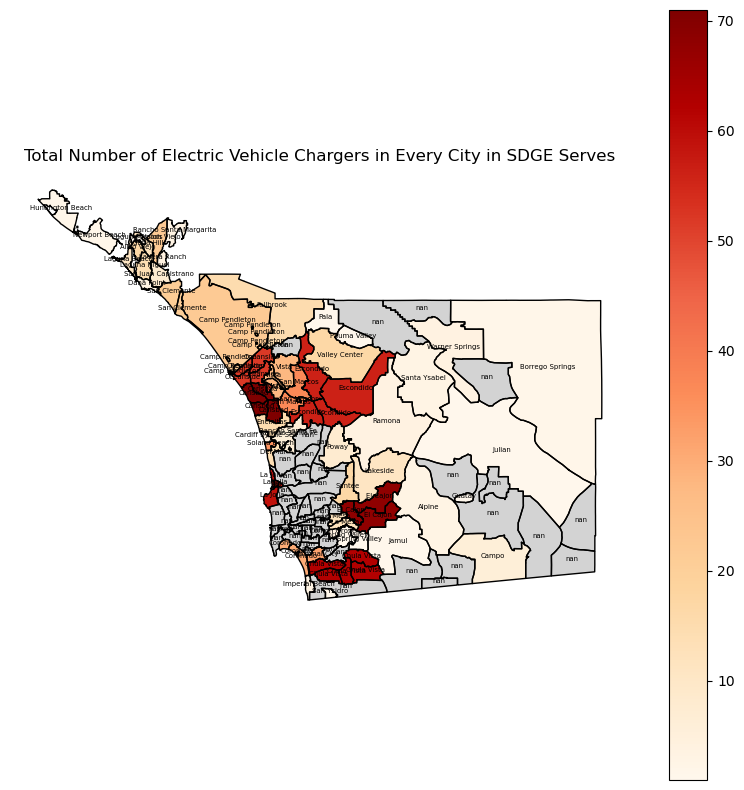

In [17]:
#Creating a choropleth map for the number of chargers in every city, excluding San Diego

#Dataframe without San Diego chargers
gdf2 = sdge_df.merge(total_chargers[total_chargers['city'] != 'San Diego'], left_on='name', right_on='city', how = 'left')  # Adjust 'name' if needed
gdf2

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
gdf2.boundary.plot(ax=ax, linewidth=1, color='black') 
gdf2.plot(column='num_chargers', ax=ax, legend=True,
         cmap='OrRd',  # Choose a colormap
         missing_kwds={'color': 'lightgrey', 'label': 'Missing values'})  # Handle missing values

# Customize the plot
plt.title('Total Number of Electric Vehicle Chargers in Every City in SDGE Serves')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off') 

#Putting labels for every city
for x, y, label in zip(gdf2.geometry.centroid.x, gdf2.geometry.centroid.y, gdf2['city']):
    ax.annotate(label, xy=(x, y), horizontalalignment='center', fontsize=5, color='black')


# Show the plot
plt.show()

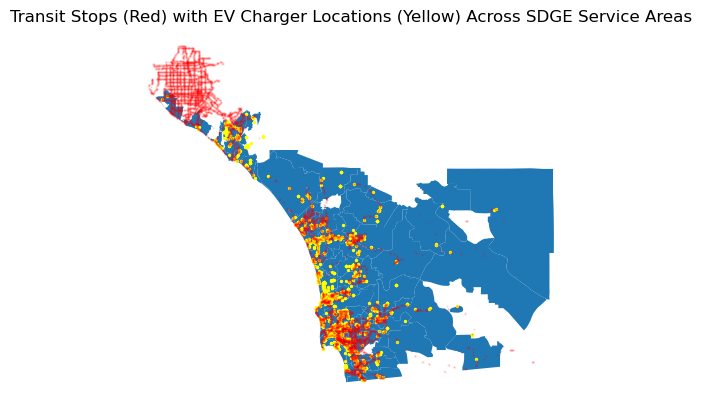

In [18]:
#Creating a map of how close EV chargers are to transit stops

#Data for every transit stop in San Diego county
geo_df7 = gpd.read_file('transit_stops.geojson')

#Data for every transit stop in Orange County
geo_df8 = gpd.read_file('oc_transit.geojson')

ax = gdf.plot()

# Plot the second GeoDataFrame on top
gdf_test = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
ax1 = gdf_test.plot(ax=ax, color = 'yellow', markersize = 2)
ax2 = geo_df7.plot(ax=ax1, color="red", markersize = 0.5, alpha = 0.1)
geo_df8.plot(ax=ax2, color="red", markersize = 0.5, alpha = 0.1)


plt.title('Transit Stops (Red) with EV Charger Locations (Yellow) Across SDGE Service Areas');
plt.axis('off');